In [47]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [48]:
df=pd.read_csv('housing.csv')

In [49]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [50]:
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [51]:
print(df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of        date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     False  False     False      False        False     False   False   
1     False  False     False      False        False     False   False   
2     False  False     False      False        False     False   False   
3     False  False     False      False        False     False   False   
4     False  False     False      False        False     False   False   
...     ...    ...       ...        ...          ...       ...     ...   
4595  False  False     False      False        False     False   False   
4596  False  False     False      False        False     False   False   
4597  False  False     False      False        False     False   False   
4598  False  False     False      False        False     False   False   
4599  False  False     False      False        False     False   False   

      waterfront   view  condition  sqft_above  s

<ipython-input-52-3e57d600f580>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


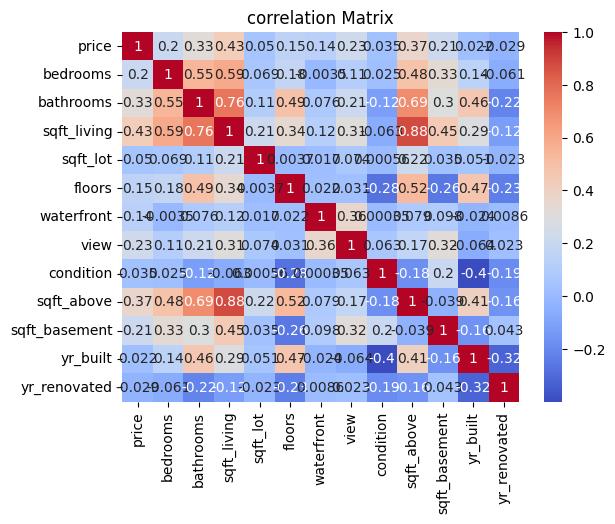

In [52]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation Matrix")
plt.show()

In [54]:
X=df[['sqft_living','sqft_lot','floors','waterfront','view','condition']]
Y=df['price']

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [56]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [57]:
Y_prend=model.predict(X_test)
mse=mean_squared_error(Y_test,Y_prend)
r2=r2_score(Y_test,Y_prend)
print("Mean squared Error:",mse)
print("R-squared:",r2)

Mean squared Error: 985832678755.7789
R-squared: 0.03335175113564226


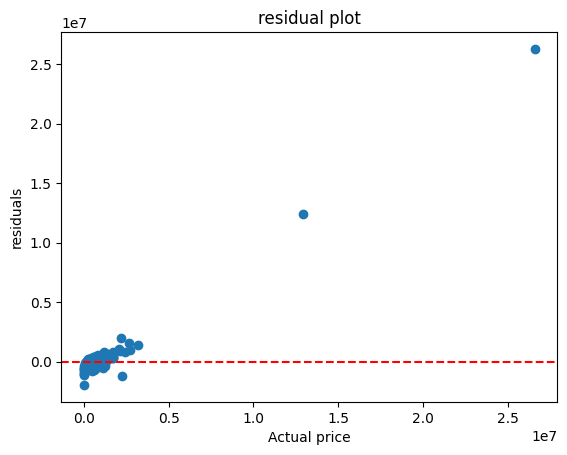

predicted price: 17638179963.660572


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
residuals=Y_test-Y_prend
plt.scatter(Y_test,residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Actual price")
plt.ylabel("residuals")
plt.title("residual plot")
plt.show()
new_data=[[3,2,1500,40001,0,3]]
predicted_price= model.predict(new_data)
print("predicted price:",predicted_price[0])